In [2]:
#!  mamba install seaborn=0.9.0-y

In [3]:
%pip install seaborn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
import scipy.stats as stats



In [5]:
path = "data/kuesioner.csv"
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q1      100 non-null    int64
 1   Q2      100 non-null    int64
 2   Q3      100 non-null    int64
 3   Q4      100 non-null    int64
 4   Q5      100 non-null    int64
 5   Q6      100 non-null    int64
 6   Q7      100 non-null    int64
 7   Q8      100 non-null    int64
 8   Q9      100 non-null    int64
 9   Q10     100 non-null    int64
 10  Q11     100 non-null    int64
 11  Q12     100 non-null    int64
 12  Q13     100 non-null    int64
 13  Q14     100 non-null    int64
 14  Q15     100 non-null    int64
 15  Q16     100 non-null    int64
 16  Q17     100 non-null    int64
 17  Q18     100 non-null    int64
 18  Q19     100 non-null    int64
 19  Q20     100 non-null    int64
 20  Q21     100 non-null    int64
 21  Q22     100 non-null    int64
 22  Q23     100 non-null    int64
 23  Q24     100 non-

In [6]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38
0,3,5,5,4,4,3,2,3,3,4,...,5,5,3,2,2,4,5,2,3,3
1,4,4,4,4,5,5,4,4,3,3,...,4,4,4,4,5,5,5,3,4,4
2,3,5,5,5,4,2,5,5,3,3,...,5,5,5,3,4,4,5,5,5,5
3,4,4,2,5,5,4,5,3,4,4,...,5,5,3,3,4,5,5,5,5,5
4,5,5,5,5,5,5,4,2,4,3,...,5,5,5,5,5,5,5,5,5,5


In [7]:
df = df.astype(float)

In [8]:
#cara singkat menggunakan iloc[baris, kolom]
df["shipping"] = df.iloc[:,0:8].sum(axis=1)
df["content"] = df.iloc[:,8:22].sum(axis=1)
df["purchase"] = df.iloc[:,22:38].sum(axis=1)


#Cara konvensional untuk menjumlahkan kolom
# df["shipping"] = df[["Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8"]].sum(axis=1)
# df["content"] = df[["Q9","Q10","Q11","Q12","Q13","Q14","Q15","Q16","Q17","Q18","Q19","Q20","Q21","Q22"]].sum(axis=1)
# df["purchase"] = df[["Q23","Q24","Q25","Q26","Q27","Q28","Q29","Q30","Q31","Q32","Q33","Q34","Q35","Q36","Q37","Q38"]].sum(axis=1)

In [9]:
var = df[["shipping", "content", "purchase"]]
var.describe()

,shipping,content,purchase
count,100.000000,100.000000,100.000000
mean,32.100000,53.280000,68.090000
std,5.084141,7.565312,7.308629
min,14.000000,37.000000,48.000000
25%,30.000000,48.000000,64.000000
50%,32.000000,54.500000,68.000000
75%,36.000000,56.000000,73.250000
max,40.000000,70.000000,80.000000


In [10]:
ship_corr, p_value_ship = stats.pearsonr(var['shipping'], var['purchase'])
cont_corr, p_value_cont = stats.pearsonr(var['content'], var['purchase'])

print(f"Korelasi Free Shipping Delivery terhadap Purchase Decision adalah: , {ship_corr}. dan nilai P Value nya adalah: , {p_value_ship}.")
print(f"Korelasi Content Marketing terhadap Purchase Decision adalah: , {cont_corr}. dan nilai P Value nya adalah: , {p_value_cont}." )

Korelasi Free Shipping Delivery terhadap Purchase Decision adalah: , 0.3593979842825683. dan nilai P Value nya adalah: , 0.0002403875572385563.
Korelasi Content Marketing terhadap Purchase Decision adalah: , 0.4478477660837353. dan nilai P Value nya adalah: , 2.9820489777342663e-06.


In [11]:
var.corr() #seluruh kolom dalam dataframe var
var[['content', 'shipping', 'purchase']].corr().round(3)

,content,shipping,purchase
content,1.000,0.258,0.448
shipping,0.258,1.000,0.359
purchase,0.448,0.359,1.000


In [12]:
shipping_corr = var['shipping'].corr(var['purchase']).round(3)
content_corr = var['content'].corr(var['purchase']).round(3)
#ship_cont_corr = var.corr()

print("Korelasi Free Shipping Delivery terhadap Purchase Decision adalah: ", shipping_corr)
print("Korelasi Content Marketing terhadap Purchase Decision adalah: ", content_corr)
#print(ship_cont_corr)

Korelasi Free Shipping Delivery terhadap Purchase Decision adalah:  0.359
Korelasi Content Marketing terhadap Purchase Decision adalah:  0.448


In [13]:
shipping_r2 = shipping_corr ** 2
content_r2 = content_corr ** 2

print(f"Koefisien Determinasi (R Square) Free Shipping Delivery terhadap Purchase Decision adalah: {shipping_r2}")
print(f"Koefisien Determinasi (R Square) Content Marketing terhadap Purchase Decision adalah: {content_r2}")

Koefisien Determinasi (R Square) Free Shipping Delivery terhadap Purchase Decision adalah: 0.128881
Koefisien Determinasi (R Square) Content Marketing terhadap Purchase Decision adalah: 0.20070400000000002


In [14]:
adj_shipping_r2 = 1 - ((1 - shipping_r2) * (len(var['shipping']) - 1)) / (len(var['shipping']) - 2 - 1)
adj_content_r2 =  1 - ((1 - content_r2) * (len(var['content']) - 1)) / (len(var['content']) - 2 - 1)

print(f"Adjusted R Square Free Shipping Delivery terhadap Purchase Decision adalah: {adj_shipping_r2}, artinya Free Shipping Delivery berpengaruh terhadap Purchase Decision sebesar {round((adj_shipping_r2*100), 1)} persen")
print(f"Adjusted R Square Content Marketing terhadap Purchase Decision adalah: {adj_content_r2}, artinya Content Marketing berpengaruh terhadap Purchase Decision sebesar {round((adj_content_r2*100), 1)} persen")

Adjusted R Square Free Shipping Delivery terhadap Purchase Decision adalah: 0.11091978350515463, artinya Free Shipping Delivery berpengaruh terhadap Purchase Decision sebesar 11.1 persen
Adjusted R Square Content Marketing terhadap Purchase Decision adalah: 0.18422367010309282, artinya Content Marketing berpengaruh terhadap Purchase Decision sebesar 18.4 persen


In [15]:
var_ind = var[['shipping', 'content']]
var_dep = var['purchase']

In [16]:
#menghitung model regresi X1 & X2 terhadap Y
#Sekaligus menghirung R Square & adj R square
#Untuk nilai koefisien korelasi tinggal mengakar kuadratkan R square)

var_ind = sm.add_constant(var_ind)

model = sm.OLS(var_dep, var_ind).fit()
print(model.params)
print(f'Konstanta adalah: {model.params[0]} | Koefisien shipping adalah: {model.params[1]} | Koefisien content adalah: {model.params[2]}')
print(model.summary2())


#intercept = 35.4575 (dari nilai const)
#coefficient = masing2 0.3754 dan 0.3657

const       36.457495
shipping     0.375447
content      0.367505
dtype: float64
Konstanta adalah: 36.45749543346609 | Koefisien shipping adalah: 0.3754472061271874 | Koefisien content adalah: 0.367504678112823
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.249   
Dependent Variable: purchase         AIC:                655.9098
Date:               2024-06-22 14:44 BIC:                663.7253
No. Observations:   100              Log-Likelihood:     -324.95 
Df Model:           2                F-statistic:        17.42   
Df Residuals:       97               Prob (F-statistic): 3.44e-07
R-squared:          0.264            Scale:              40.112  
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const      36.4575     5.4102   6.7387   0.0000   25.7198   47.1952
shippi

In [17]:
#menghitung koefisien korelasi X1X2 terhadap Y
# SQRT(R Square)
import math
round(math.sqrt(0.264), 3)

0.514

In [18]:
#Menghitung model regresi X1 terhadap Y
#Sekaligus menghitung R square dan adj R square
#Untuk nilai koefisien korelasi tinggal mengakar kuadratkan R square)

X1 = var['shipping']
X1 = sm.add_constant(X1)
model1 = sm.OLS(var_dep, X1).fit()
print(model1.summary2());

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.120   
Dependent Variable: purchase         AIC:                670.7633
Date:               2024-06-22 14:44 BIC:                675.9737
No. Observations:   100              Log-Likelihood:     -333.38 
Df Model:           1                F-statistic:        14.54   
Df Residuals:       98               Prob (F-statistic): 0.000240
R-squared:          0.129            Scale:              46.991  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const         51.5056    4.4036  11.6963  0.0000  42.7669  60.2444
shipping       0.5166    0.1355   3.8126  0.0002   0.2477   0.7856
-----------------------------------------------------------------
Omnibus:               2.602        Durbin-Watson:          2.233
Prob(Omnibus):        

In [19]:
#Menghitung model regresi X1 terhadap Y
#Sekaligus menghitung R square dan adj R square
#Untuk nilai koefisien korelasi tinggal mengakar kuadratkan R square)

X2 = var['content']
X2 = sm.add_constant(X2)
model2 = sm.OLS(var_dep, X2).fit()
print(model2.summary2())
intercept, coefficient = model2.params
print(f"Intercept nya adalah: {intercept}, dan Koefisiennya adalah: {coefficient}")

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.192   
Dependent Variable: purchase         AIC:                662.2085
Date:               2024-06-22 14:44 BIC:                667.4188
No. Observations:   100              Log-Likelihood:     -329.10 
Df Model:           1                F-statistic:        24.59   
Df Residuals:       98               Prob (F-statistic): 2.98e-06
R-squared:          0.201            Scale:              43.138  
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const      45.0383     4.6951   9.5927   0.0000   35.7210   54.3555
content     0.4327     0.0873   4.9585   0.0000    0.2595    0.6058
-----------------------------------------------------------------
Omnibus:               2.974        Durbin-Watson:          1.900
Prob(Omnibus):   

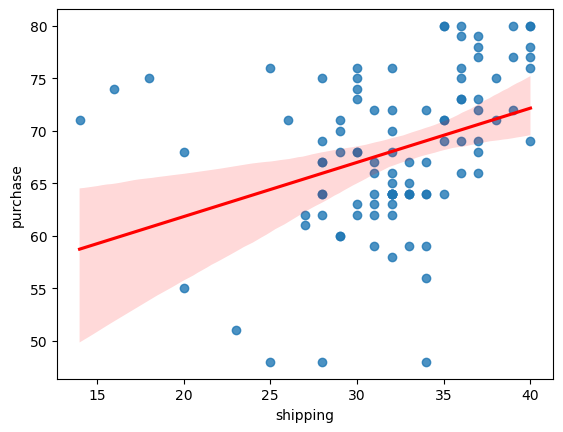

In [20]:
sns.regplot(x='shipping', y='purchase', data=var, line_kws={"color": "red"});

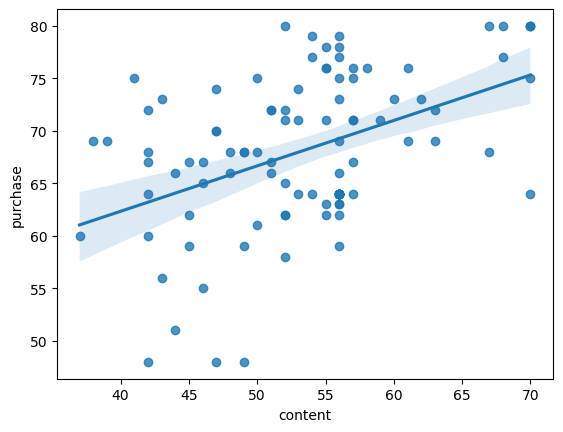

In [21]:
sns.regplot(x= 'content', y='purchase', data=var);

In [22]:
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'shipping', 'content',
       'purchase'],
      dtype='object')

In [23]:
df[['Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'purchase']].corr()

,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,purchase
Q23,1.000000,0.663169,0.504177,0.462243,0.270988,0.379038,0.388440,0.301044,0.276493,0.290495,0.450194,0.547315,0.516385,0.266091,0.290564,0.314836,0.663039
Q24,0.663169,1.000000,0.532133,0.458473,0.144583,0.319366,0.219594,0.240199,0.304670,0.358091,0.423995,0.453566,0.402212,0.290858,0.348909,0.351193,0.617673
Q25,0.504177,0.532133,1.000000,0.397734,0.239066,0.312637,0.175591,0.370463,0.252287,0.389187,0.491808,0.445501,0.388225,0.352341,0.363109,0.201989,0.626749
Q26,0.462243,0.458473,0.397734,1.000000,0.215642,0.375468,0.266847,0.423102,0.344044,0.292498,0.396425,0.450046,0.317028,0.320092,0.335128,0.400982,0.619758
Q27,0.270988,0.144583,0.239066,0.215642,1.000000,0.503537,0.139699,0.159820,0.226140,0.313425,0.279596,0.239832,0.298926,0.199033,0.209439,0.265052,0.484266
Q28,0.379038,0.319366,0.312637,0.375468,0.503537,1.000000,0.467012,0.522198,0.235310,0.238971,0.411208,0.430931,0.324612,0.539211,0.479873,0.450431,0.696113
Q29,0.388440,0.219594,0.175591,0.266847,0.139699,0.467012,1.000000,0.391588,0.113431,0.192358,0.420805,0.530524,0.422655,0.345773,0.292037,0.501200,0.573371
Q30,0.301044,0.240199,0.370463,0.423102,0.159820,0.522198,0.391588,1.000000,0.243953,0.284037,0.223376,0.277357,0.433933,0.419689,0.368737,0.244937,0.579744
Q31,0.276493,0.304670,0.252287,0.344044,0.226140,0.235310,0.113431,0.243953,1.000000,0.605657,0.369624,0.269161,0.225628,0.456855,0.361319,0.281391,0.542311
Q32,0.290495,0.358091,0.389187,0.292498,0.313425,0.238971,0.192358,0.284037,0.605657,1.000000,0.431946,0.258255,0.232328,0.430251,0.308991,0.224043,0.577540


In [24]:
df[['shipping', 'content', 'purchase']].corr(method='spearman')

,shipping,content,purchase
shipping,1.000000,0.302563,0.439674
content,0.302563,1.000000,0.387111
purchase,0.439674,0.387111,1.000000


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(var_ind, var_dep)

In [ ]:
#R Square
r_square_x1x2y = model.score(var_ind, var_dep)
r_square_x1x2y

In [ ]:
model.fit(var_ind[['shipping']], var_dep)

In [ ]:
r_square_x1y = model.score(var_ind[['shipping']], var_dep)
r_square_x1y

In [ ]:
model.fit(var_ind[['content']], var_dep)

In [ ]:
r_square_x2y =model.score(var_ind[['content']], var_dep)
r_square_x2y